# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo anterior. Qual tem melhor coeficiente de determinação?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
formula = "tip ~ sex + smoker + day + net_bill"
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

model1 = sm.OLS(y, X).fit()
print("\nModelo 1 - Todas as variáveis:")
print(model1.summary())


Modelo 1 - Todas as variáveis:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.30e-19
Time:                        13:39:50   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     

In [5]:
pvalues = model1.pvalues

nonsig_vars = pvalues[pvalues > 0.05].index.tolist()

print("Variáveis não significativas (p > 0.05):", nonsig_vars)

Variáveis não significativas (p > 0.05): ['sex[T.Female]', 'smoker[T.No]', 'day[T.Fri]', 'day[T.Sat]', 'day[T.Sun]']


In [6]:
sig_vars = [var for var in X.columns if var not in nonsig_vars]

formula2 = "tip ~ " + " + ".join([var for var in sig_vars if var != "Intercept"])

y2, X2 = patsy.dmatrices(formula2, data=tips, return_type='dataframe')

In [7]:
model2 = sm.OLS(y2, X2).fit()

print("\nModelo 2 - Apenas variáveis significativas:")
print(model2.summary())


Modelo 2 - Apenas variáveis significativas:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.02e-23
Time:                        13:39:50   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

Text(0.5, 1.0, 'Residuos x net_bill')

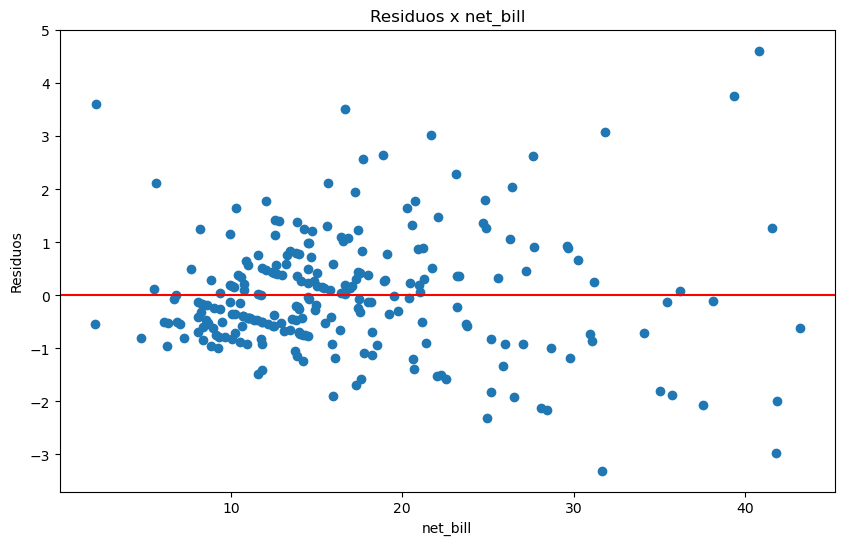

In [8]:
residuals = model2.resid

plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('net_bill')
plt.ylabel('Residuos')
plt.title('Residuos x net_bill')

In [9]:
tips['log_net_bill'] = np.log(tips['net_bill'])

formula3 = formula2.replace('net_bill', 'log_net_bill')

y3, X3 = patsy.dmatrices(formula3, data=tips, return_type='dataframe')

model3 = sm.OLS(y3, X3).fit()

print("Modelo 3 - Com log(net_bill):")

print(model3.summary())

Modelo 3 - Com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           4.40e-20
Time:                        13:39:51   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1

In [10]:
formula4 = formula3 + " + I(net_bill**2)"
y4, X4 = patsy.dmatrices(formula4, data=tips, return_type='dataframe')
model4 = sm.OLS(y4, X4).fit()
print("Modelo 4 - Com net_bill polinomial (quadrático):")
print(model4.summary())

Modelo 4 - Com net_bill polinomial (quadrático):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     57.54
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           3.74e-21
Time:                        13:39:51   Log-Likelihood:                -377.33
No. Observations:                 244   AIC:                             760.7
Df Residuals:                     241   BIC:                             771.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [11]:
models = [model2, model3, model4]

model_names = ['Linear', 'Log', 'Polinomio']

r2_values = [model.rsquared for model in models]

rmse_values = [np.sqrt(mean_squared_error(y, model.predict(X))) for model, y, X in [(model2, y2, X2), (model3, y3, X3), (model4, y4, X4)]]

comparacao = pd.DataFrame({'Modelo': model_names, 'R²': r2_values, 'RMSE': rmse_values})

print("Comparação dos modelos:")
print(comparacao)

Comparação dos modelos:
      Modelo        R²      RMSE
0     Linear  0.332541  1.128088
1        Log  0.294441  1.159838
2  Polinomio  0.323176  1.135974


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [140]:
tips['log_tip'] = np.log(tips['tip'])
formula = "log_tip ~ sex + smoker + day + net_bill"
y, X = patsy.dmatrices(formula, data = tips, return_type='dataframe')

model_log1 = sm.OLS(y, X).fit()
print(model_log1.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     18.75
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           7.85e-18
Time:                        15:59:47   Log-Likelihood:                -95.867
No. Observations:                 244   AIC:                             205.7
Df Residuals:                     237   BIC:                             230.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4554      0.082      5.527

In [144]:
pvalues = model_log1.pvalues

nonsig_vars = pvalues[pvalues > 0.05].index.tolist()

print("Variáveis não significativas (p > 0.05):", nonsig_vars)


Variáveis não significativas (p > 0.05): ['sex[T.Female]', 'smoker[T.No]', 'day[T.Fri]', 'day[T.Sat]', 'day[T.Sun]']


In [150]:
sig_vars = [var for var in X.columns if var not in nonsig_vars]

formula2 = "log_tip ~ " + " + ".join([var for var in sig_vars if var != "Intercept"])

y2, X2 = patsy.dmatrices(formula2, data=tips, return_type='dataframe')

In [152]:
model2 = sm.OLS(y2, X2).fit()

print("\nModelo 2 - Apenas variáveis significativas:")
print(model2.summary())


Modelo 2 - Apenas variáveis significativas:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.60e-21
Time:                        16:00:54   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

Text(0.5, 1.0, 'Residuos x net_bill')

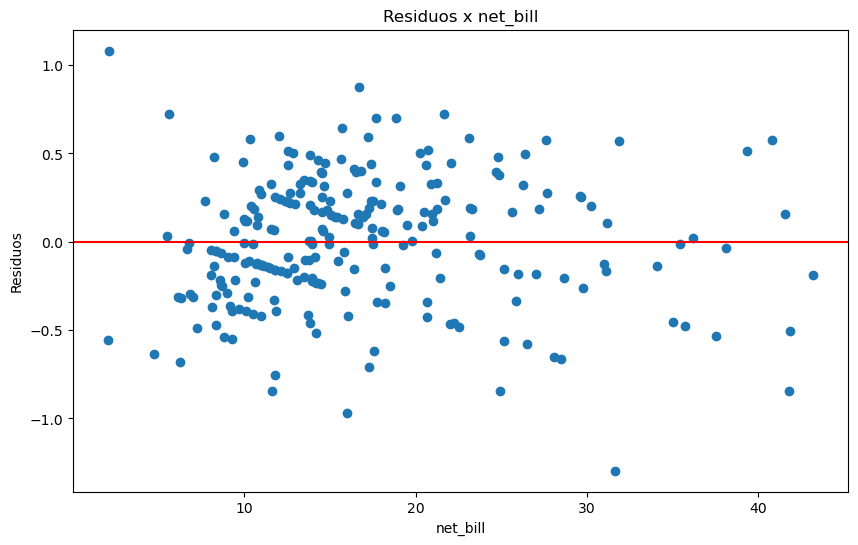

In [154]:
residuals = model2.resid

plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('net_bill')
plt.ylabel('Residuos')
plt.title('Residuos x net_bill')

In [156]:
tips['log_net_bill'] = np.log(tips['net_bill'])

formula3 = formula2.replace('net_bill', 'log_net_bill')

y3, X3 = patsy.dmatrices(formula3, data=tips, return_type='dataframe')

model3 = sm.OLS(y3, X3).fit()

print("Modelo 3 - Com log(net_bill):")

print(model3.summary())

Modelo 3 - Com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.62e-22
Time:                        16:02:33   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0

In [158]:
formula4 = formula3 + " + I(net_bill**2)"
y4, X4 = patsy.dmatrices(formula4, data=tips, return_type='dataframe')
model4 = sm.OLS(y4, X4).fit()
print("Modelo 4 - Com net_bill polinomial (quadrático):")
print(model4.summary())

Modelo 4 - Com net_bill polinomial (quadrático):
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     57.02
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.30e-21
Time:                        16:03:10   Log-Likelihood:                -95.995
No. Observations:                 244   AIC:                             198.0
Df Residuals:                     241   BIC:                             208.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [160]:
models = [model2, model3, model4]

model_names = ['Linear', 'Log', 'Polinomio']

r2_values = [model.rsquared for model in models]

rmse_values = [np.sqrt(mean_squared_error(y, model.predict(X))) for model, y, X in [(model2, y2, X2), (model3, y3, X3), (model4, y4, X4)]]

comparacao = pd.DataFrame({'Modelo': model_names, 'R²': r2_values, 'RMSE': rmse_values})

print("Comparação dos modelos:")
print(comparacao)

Comparação dos modelos:
      Modelo        R²      RMSE
0     Linear  0.310605  0.361401
1        Log  0.319191  0.359143
2  Polinomio  0.321207  0.358611


polinomio foi o melhor.

In [165]:
y_orig = tips['tip']
y_pred = np.exp(model4.predict(X4))
r2_orig = r2_score(y_orig, y_pred)
print(r2_orig)

0.3074023911052308


O modelo do item 1 possui melhor coeficiente.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

## 1)

In [23]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [25]:
df = df.dropna()
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [27]:
df = pd.get_dummies(df, columns=['sexo','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

In [29]:
X = df['tempo_emprego']
y = df['renda']

X = sm.add_constant(X)

modelo_simples = sm.OLS(y, X).fit()
print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:40:46   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2653.9453     60.924     43.561

## 2)

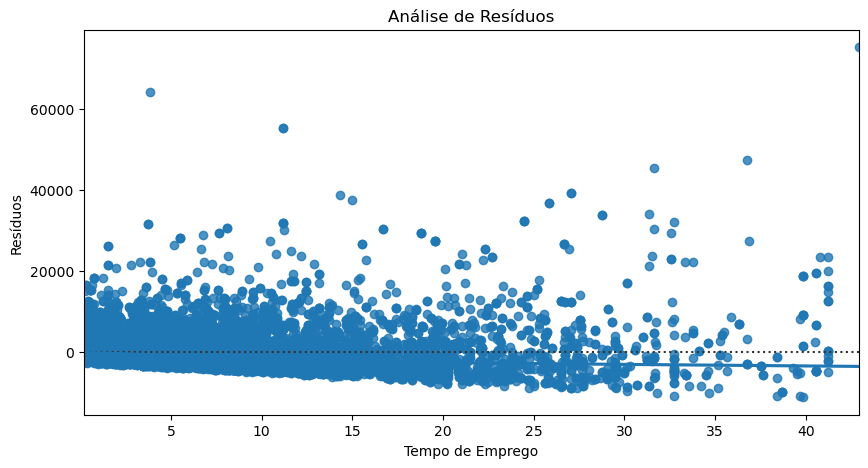

In [31]:
residuos = modelo_simples.resid
plt.figure(figsize=(10, 5))
sns.residplot(x=df['tempo_emprego'], y=residuos, lowess=True)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

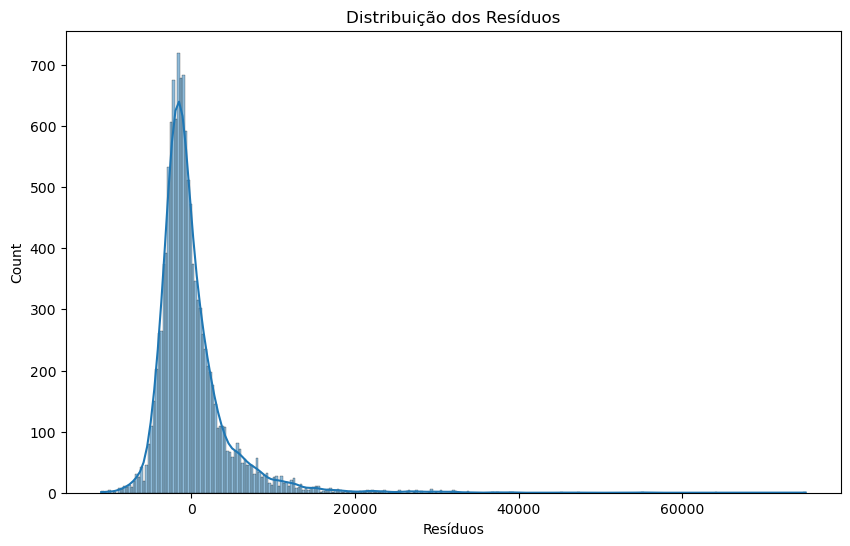

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()


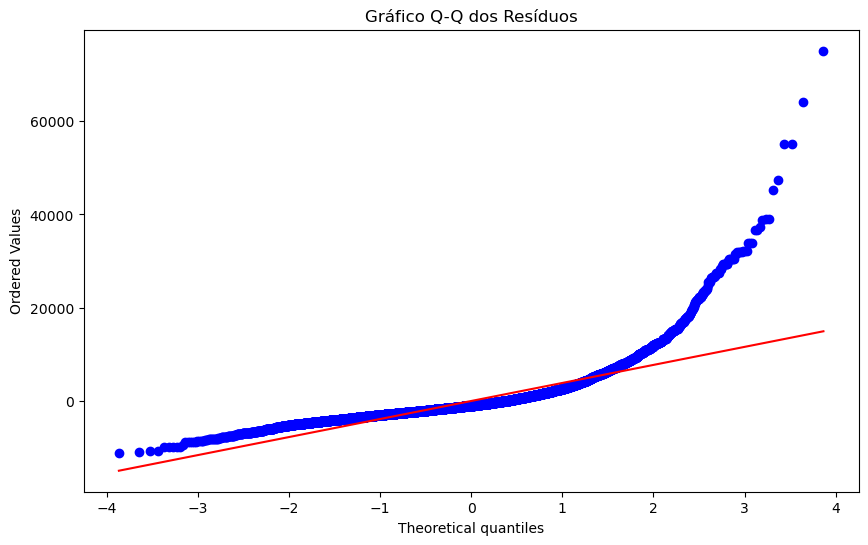

In [33]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos, plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

Analise dos residuos transformação simples:

- Residuos apresentam amplitude vertical grande.
- Heterocedasticidade clara com a variância aumentando à medida que x aumenta.
- Grande presença de outliers.
- Os residuos apresentam variância nao contante.

Uma alternativa para a melhoria da regressão é a transformação é aplicar logaritmo nos valores de renda, de modo a estabilizar a variancia, normalizar a distribuição do erro e reduzir o impacto dos outliers.

Sendo assim a regressão utilizando log de renda ficará:

In [69]:
df['log_renda'] = np.log(df['renda'])

X = df['tempo_emprego']
X = sm.add_constant(X)
y = df['log_renda']

modelo_log = sm.OLS(y, X).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:05:25   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8074      0.010    774.002

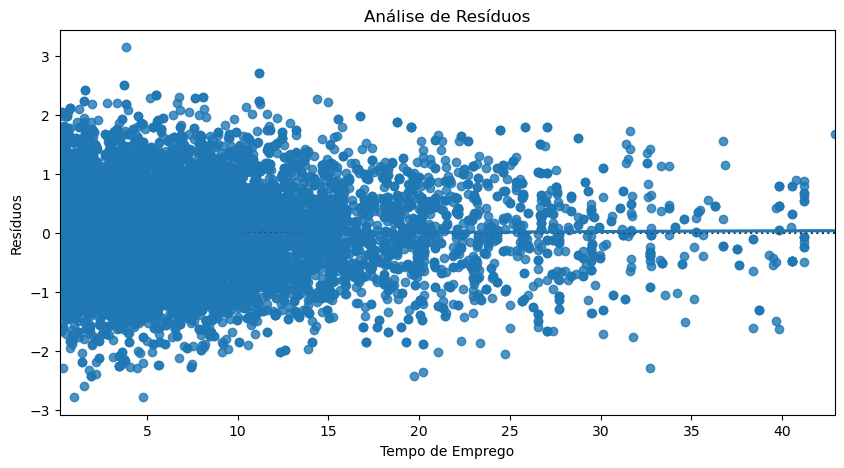

In [71]:
residuos = modelo_log.resid
plt.figure(figsize=(10, 5))
sns.residplot(x=df['tempo_emprego'], y = residuos, lowess=True)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

Analise dos residuos do modelo com log_renda:

- A transformação logarítmica reduziu significativamente a variância dos resíduos.
- O modelo com transformação logarítmica parece ter uma estrutura de erro mais consistente e previsível.
- A transformação logarítmica comprimiu os valores extremos, reduzindo o impacto de outliers de alta renda.

Sendo assim para realizar as regressões multiplas, tambem será utilizado 'log_renda' ao inves de 'renda'.

## 3)

In [41]:
df = df.map(lambda x: int(x) if isinstance(x, bool) else x)
df.dtypes

#transformando as dummies bool em int para ser possivel utilizar a regressao do statsmodel

Unnamed: 0                         int64
data_ref                          object
index                              int64
posse_de_veiculo                   int64
posse_de_imovel                    int64
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
mau                                int64
renda                            float64
sexo_M                             int64
tipo_renda_Bolsista                int64
tipo_renda_Empresário              int64
tipo_renda_Pensionista             int64
tipo_renda_Servidor público        int64
educacao_Pós graduação             int64
educacao_Secundário                int64
educacao_Superior completo         int64
educacao_Superior incompleto       int64
estado_civil_Separado              int64
estado_civil_Solteiro              int64
estado_civil_União                 int64
estado_civil_Viúvo                 int64
tipo_residencia_

In [73]:
X_mult = df.drop(columns=['renda', 'index', 'data_ref','log_renda'])
y_mult = df['log_renda']
X_mult = sm.add_constant(X_mult)

modelo_multiplo = sm.OLS(y, X_mult).fit()
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:21:57   Log-Likelihood:                -13203.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12439   BIC:                         2.666e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

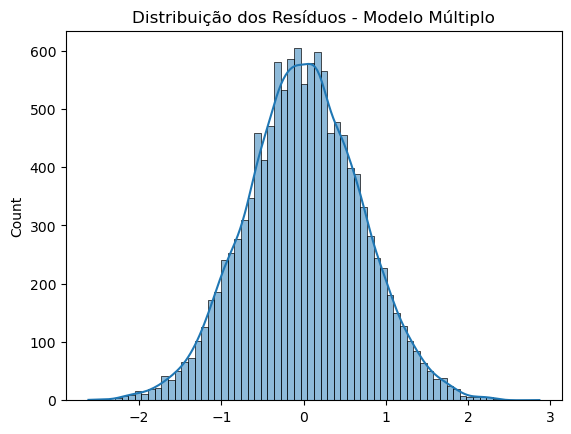

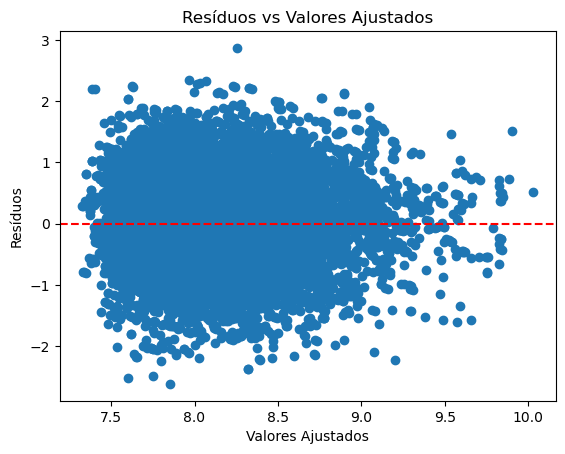

In [75]:
residuos = modelo_multiplo.resid
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos - Modelo Múltiplo")
plt.show()


plt.scatter(modelo_multiplo.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

## 4)

*Removendo variaveis nao significantes*

In [77]:
variaveis_remover = []
for var in modelo_multiplo.pvalues.index:
    if modelo_multiplo.pvalues[var] > 0.05:
        variaveis_remover.append(var)

X_mult_significativo = X_mult.drop(columns=variaveis_remover)
X_mult_significativo = sm.add_constant(X_mult_significativo)

modelo_multiplo_refinado = sm.OLS(y_mult, X_mult_significativo).fit()
print(modelo_multiplo_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     551.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:24:49   Log-Likelihood:                -13246.
No. Observations:               12466   AIC:                         2.651e+04
Df Residuals:                   12458   BIC:                         2.657e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Analise dos parametros:
- O modelo com todas as variáveis tem um R² ligeiramente maior (0.242 vs. 0.237), mas a diferença é mínima. O modelo simplificado é quase tão bom quanto o modelo completo.
- O modelo simplificado tem apenas 7 variáveis, em comparação com 26 no modelo completo. Isso reduz a complexidade e o risco de overfitting.
- O modelo simplificado tem valores de AIC e BIC ligeiramente maiores, mas a diferença é pequena, sugerindo que a perda de ajuste é mínima em relação ao ganho em simplicidade.
- O modelo simplificado tem um número de condição menor, indicando menos problemas de multicolinearidade.


## 5)

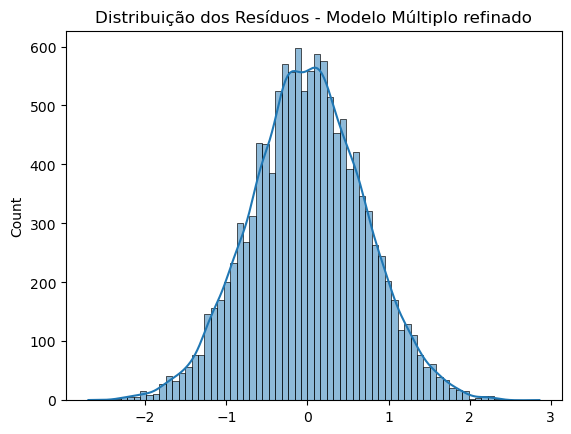

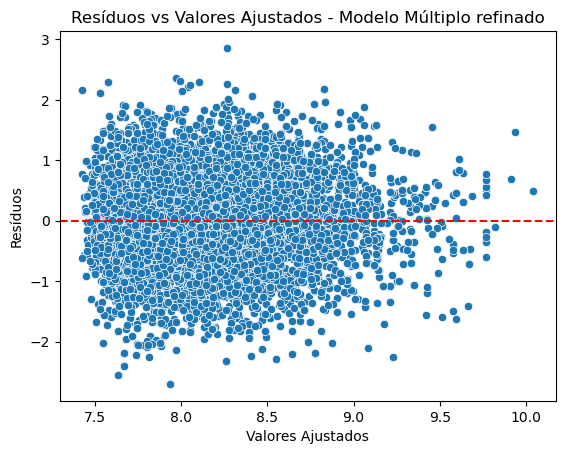

In [81]:
residuos_mult_ref = modelo_multiplo_refinado.resid
sns.histplot(residuos_mult_ref, kde=True)
plt.title("Distribuição dos Resíduos - Modelo Múltiplo refinado")
plt.show()

sns.scatterplot(x=modelo_multiplo_refinado.fittedvalues, y=residuos_mult_ref)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Ajustados - Modelo Múltiplo refinado")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()
